In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [65]:
df = pd.read_csv('DataCoSupplyChain.csv', encoding = 'unicode_escape') # Reading the dataset
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [66]:
df.shape

(180519, 53)

In [67]:
round(df.isnull().sum() / len(df)*100,3)  # Null Value Imputation

Type                               0.000
Days for shipping (real)           0.000
Days for shipment (scheduled)      0.000
Benefit per order                  0.000
Sales per customer                 0.000
Delivery Status                    0.000
Late_delivery_risk                 0.000
Category Id                        0.000
Category Name                      0.000
Customer City                      0.000
Customer Country                   0.000
Customer Email                     0.000
Customer Fname                     0.000
Customer Id                        0.000
Customer Lname                     0.004
Customer Password                  0.000
Customer Segment                   0.000
Customer State                     0.000
Customer Street                    0.000
Customer Zipcode                   0.002
Department Id                      0.000
Department Name                    0.000
Latitude                           0.000
Longitude                          0.000
Market          

In [5]:
df.info() # All variables are assigned with correct datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [68]:
df['Customer Full Name'] = df['Customer Fname']+df['Customer Lname']
df.shape

(180519, 54)

In [69]:
df=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
df.shape

(180519, 42)

In [70]:
df['Customer Zipcode']=df['Customer Zipcode'].fillna(0) # Only 2% were null values. Zipcodes can't be replaced with mean,median.

In [71]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ra

In [72]:
df['Customer Full Name'] = df['Customer Full Name'].fillna(' ') # Imputing null value

<AxesSubplot:>

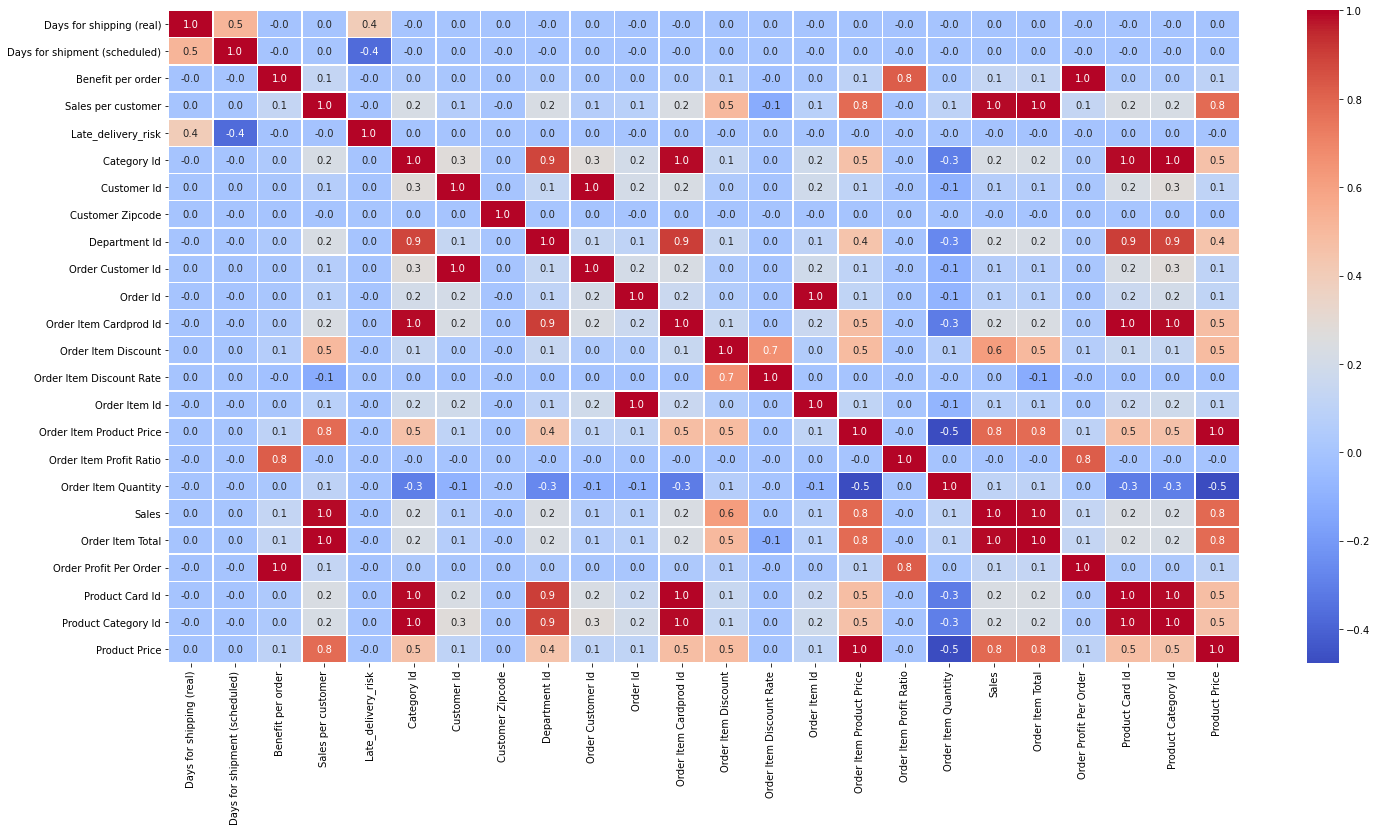

In [73]:
fig, ax = plt.subplots(figsize=(24,12))         # figsize
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f',cmap= 'coolwarm')

In [74]:
corr_df = df.corr()
corr_df[(corr_df > 0.5) | (corr_df < -0.5)]

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Order Customer Id,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price
Days for shipping (real),1.00000,0.51588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days for shipment (scheduled),0.51588,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Benefit per order,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.823689,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
Sales per customer,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.781781,NaN,NaN,0.989744,1.000000,NaN,NaN,NaN,0.781781
Late_delivery_risk,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category Id,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.888835,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991092,1.000000,NaN
Customer Id,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department Id,NaN,NaN,NaN,NaN,NaN,0.888835,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.906117,0.888835,NaN
Order Customer Id,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
corr_df[(corr_df > 0.5) | (corr_df < -0.5)].iloc[:, 0:15]

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id
Days for shipping (real),1.00000,0.51588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days for shipment (scheduled),0.51588,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Benefit per order,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales per customer,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Late_delivery_risk,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category Id,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.888835,NaN,NaN,0.991092,NaN,NaN,NaN
Customer Id,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Customer Zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department Id,NaN,NaN,NaN,NaN,NaN,0.888835,NaN,NaN,1.000000,NaN,NaN,0.906117,NaN,NaN,NaN
Order Customer Id,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [76]:
corr_df[(corr_df > 0.5) | (corr_df < -0.5)].iloc[:, 15:24]

,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price
Days for shipping (real),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days for shipment (scheduled),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Benefit per order,NaN,0.823689,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
Sales per customer,0.781781,NaN,NaN,0.989744,1.000000,NaN,NaN,NaN,0.781781
Late_delivery_risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category Id,NaN,NaN,NaN,NaN,NaN,NaN,0.991092,1.000000,NaN
Customer Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department Id,NaN,NaN,NaN,NaN,NaN,NaN,0.906117,0.888835,NaN
Order Customer Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_num = df.select_dtypes(include = np.number)
df_num.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Order Customer Id,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,20755,...,180517,327.75,0.29,1,327.75,314.640015,91.250000,1360,73,327.75
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,19492,...,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,1360,73,327.75
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,19491,...,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,1360,73,327.75
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,19490,...,179252,327.75,0.08,1,327.75,304.809998,22.860001,1360,73,327.75
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,19489,...,179251,327.75,0.45,1,327.75,298.250000,134.210007,1360,73,327.75


In [78]:
df_num.shape

(180519, 24)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


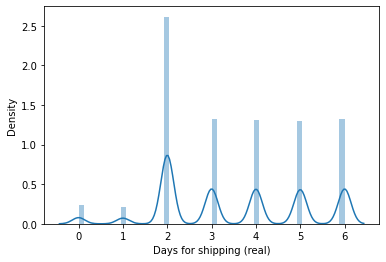

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


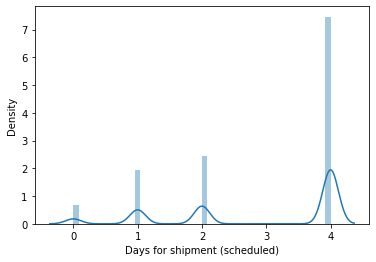

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


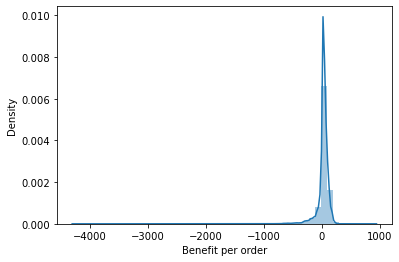

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


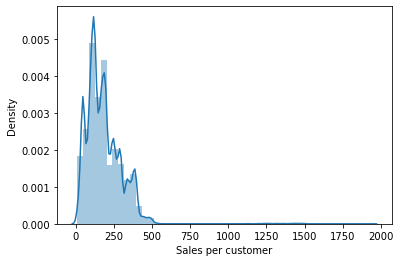

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


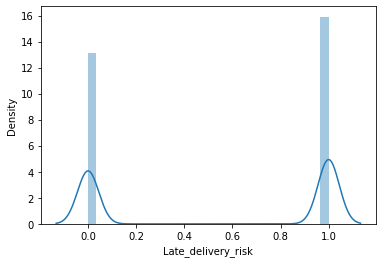

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


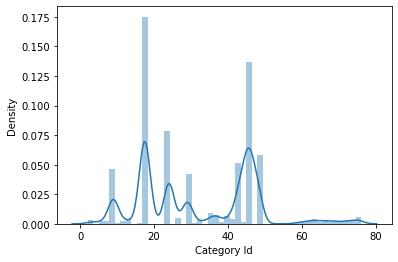

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


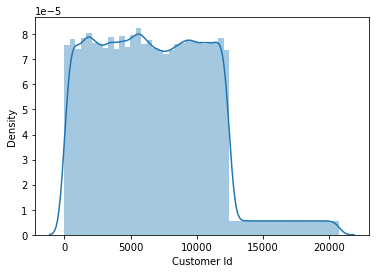

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


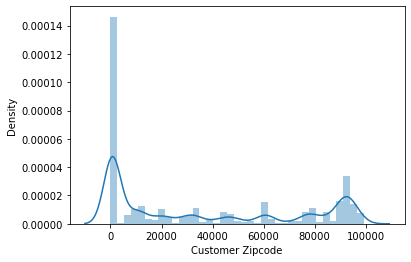

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


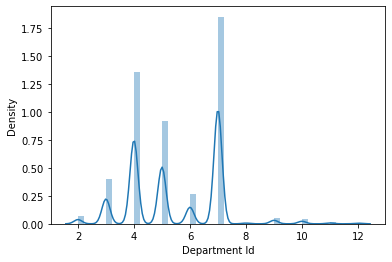

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


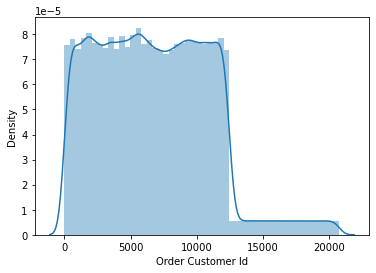

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


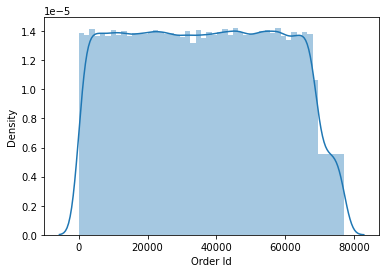

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


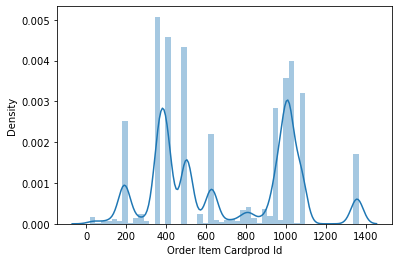

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


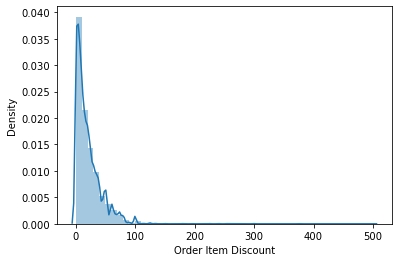

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


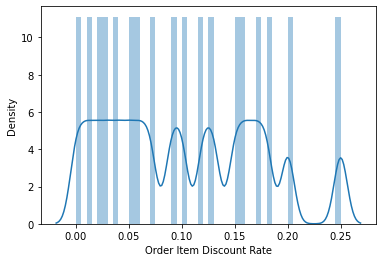

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


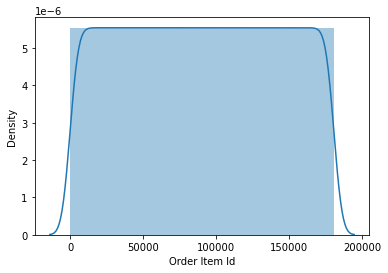

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


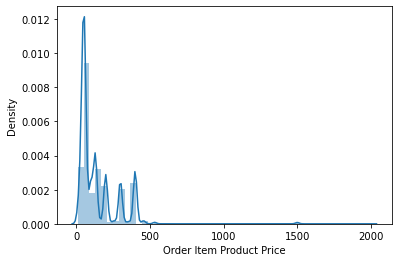

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


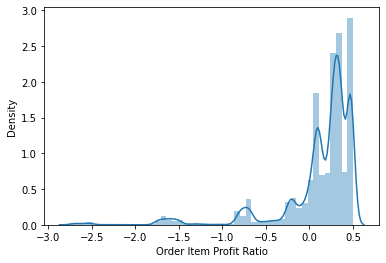

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


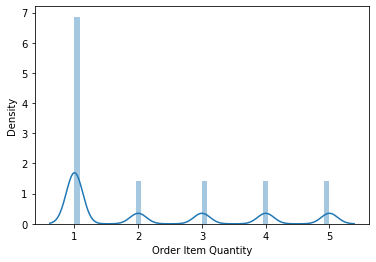

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


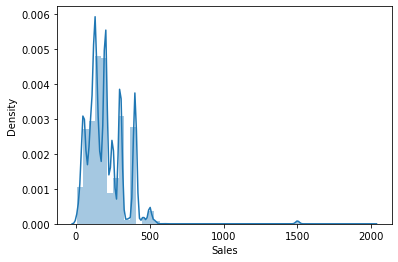

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


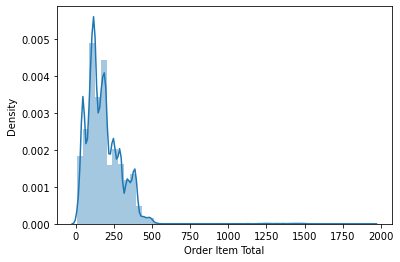

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


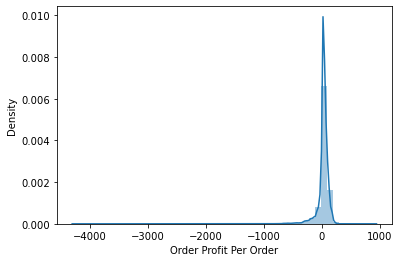

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


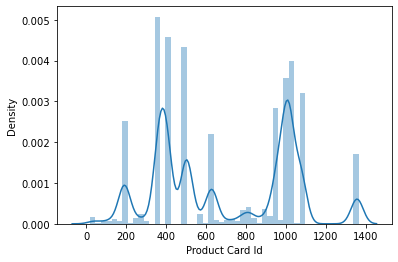

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


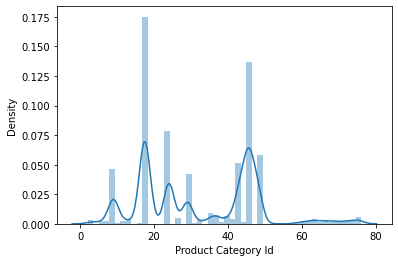

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


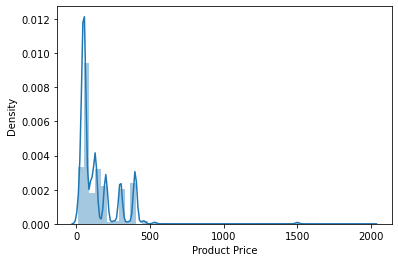

In [79]:
for i in df_num.columns:      # For checking encoded categorical columns inside numerical columns.
    sns.distplot(df_num[i])
    plt.show()

# Data Cleaning and Preprocessing

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


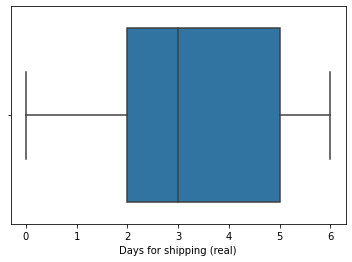

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


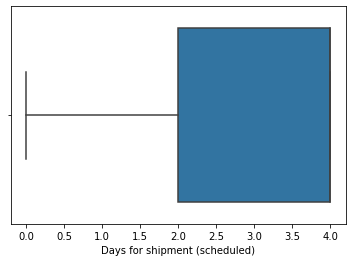

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


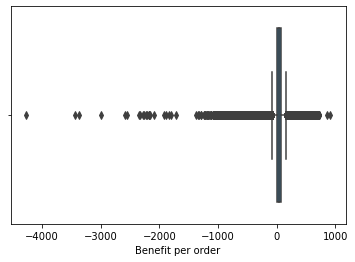

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


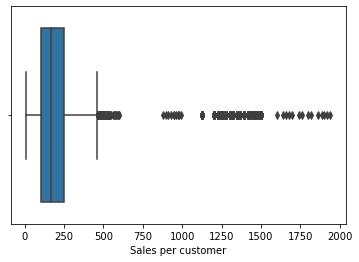

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


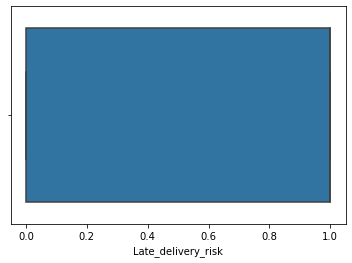

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


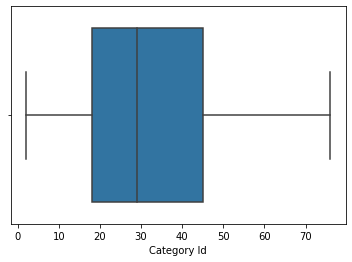

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


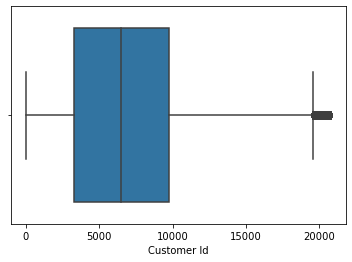

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


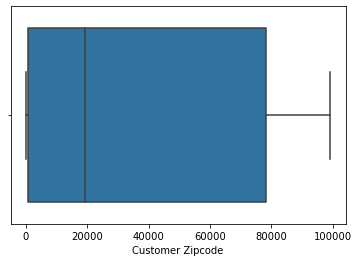

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


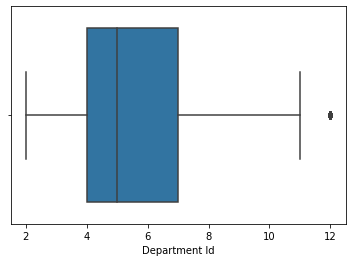

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


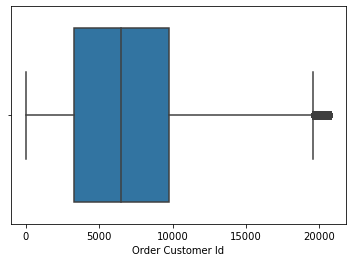

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


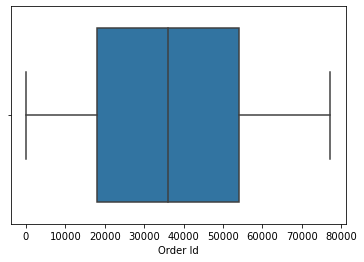

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


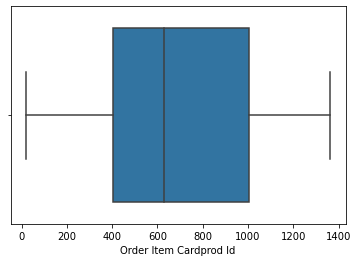

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


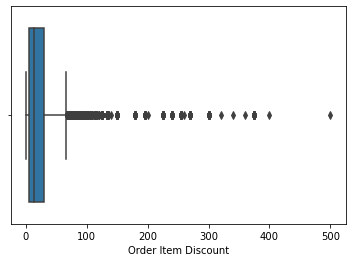

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


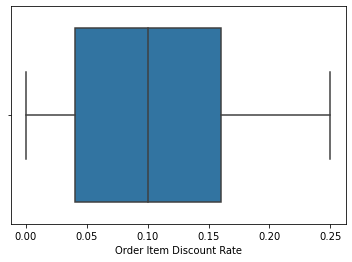

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


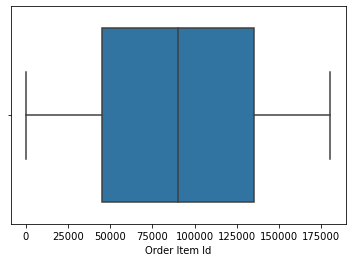

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


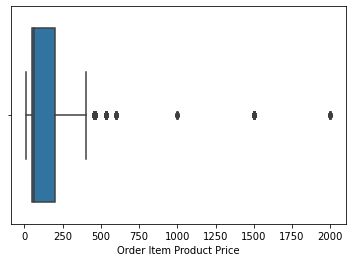

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


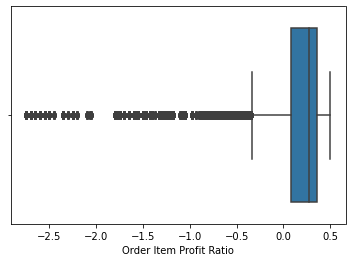

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


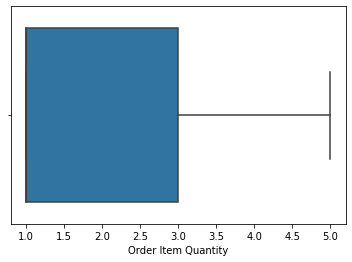

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


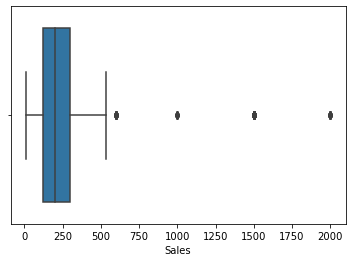

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


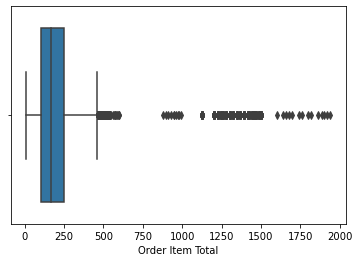

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


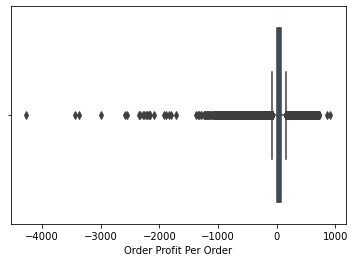

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


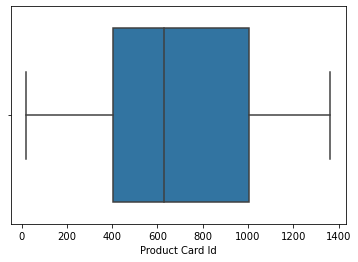

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


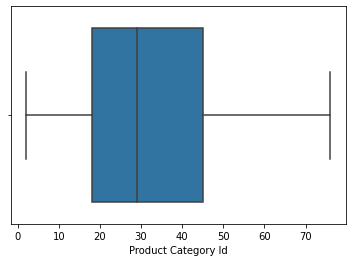

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


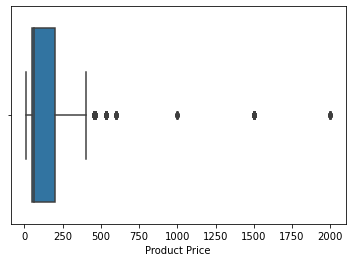

In [80]:
for i in df_num.columns:   # For checking outliers
    sns.boxplot(df[i])
    plt.show()

In [81]:
df_num.skew()

Days for shipping (real)         8.477127e-02
Days for shipment (scheduled)   -7.319983e-01
Benefit per order               -4.741834e+00
Sales per customer               2.888446e+00
Late_delivery_risk              -1.940742e-01
Category Id                      3.616248e-01
Customer Id                      4.887683e-01
Customer Zipcode                 4.909094e-01
Department Id                    2.733206e-01
Order Customer Id                4.887683e-01
Order Id                         3.270879e-02
Order Item Cardprod Id           1.382546e-01
Order Item Discount              3.039796e+00
Order Item Discount Rate         3.409276e-01
Order Item Id                    8.455466e-18
Order Item Product Price         3.191020e+00
Order Item Profit Ratio         -2.893531e+00
Order Item Quantity              8.802518e-01
Sales                            2.884249e+00
Order Item Total                 2.888446e+00
Order Profit Per Order          -4.741834e+00
Product Card Id                  1

In [82]:
for i in df_num.columns:
    print('exponential transfromation for column',i,':',np.exp(df_num[i]).skew())

exponential transfromation for column Days for shipping (real) : 1.4518531564697177
exponential transfromation for column Days for shipment (scheduled) : -0.40911693108799274
exponential transfromation for column Benefit per order : nan
exponential transfromation for column Sales per customer : nan
exponential transfromation for column Late_delivery_risk : -0.19407417010332897
exponential transfromation for column Category Id : 13.566531633600501
exponential transfromation for column Customer Id : nan
exponential transfromation for column

E:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


 Customer Zipcode : nan
exponential transfromation for column Department Id : 16.730055758706584
exponential transfromation for column Order Customer Id : nan
exponential transfromation for column Order Id : nan
exponential transfromation for column Order Item Cardprod Id : nan
exponential transfromation for column Order Item Discount : nan
exponential transfromation for column Order Item Discount Rate : 0.4474475230615523
exponential transfromation for column Order Item Id : nan
exponential transfromation for column Order Item Product Price : nan
exponential transfromation for column Order Item Profit Ratio : -1.2019222663956879
exponential transfromation for column Order Item Quantity : 1.9689852190283448
exponential transfromation for column Sales : nan
exponential transfromation for column Order Item Total : nan
exponential transfromation for column Order Profit Per Order : nan
exponential transfromation for column Product Card Id : nan
exponential transfromation for column Product

In [83]:
for i in df_num.columns:
    print('logarithmic transfromation for column',i,':',np.log(df_num[i]).skew())

E:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


logarithmic transfromation for column Days for shipping (real) : nan
logarithmic transfromation for column Days for shipment (scheduled) : nan
logarithmic transfromation for column Benefit per order : nan
logarithmic transfromation for column Sales per customer : -0.6935754839465347
logarithmic transfromation for column Late_delivery_risk : nan
logarithmic transfromation for column Category Id : -0.6739437610769157
logarithmic transfromation for column Customer Id : -1.8466431168542847
logarithmic transfromation for column Customer Zipcode : nan
logarithmic transfromation for column Department Id : -0.4186621003973122
logarithmic transfromation for column Order Customer Id : -1.8466431168542847
logarithmic transfromation for column Order Id : -1.9785573234788274
logarithmic transfromation for column Order Item Cardprod Id : -0.9077406377413899
logarithmic transfromation for column Order Item Discount : nan
logarithmic transfromation for column Order Item Discount Rate : nan
logarithmic

In [84]:
for i in df_num.columns:
    print('square transfromation for column',i,':',np.square(df_num[i]).skew())

square transfromation for column Days for shipping (real) : 0.6374158018841687
square transfromation for column Days for shipment (scheduled) : -0.4679405083068385
square transfromation for column Benefit per order : 90.4468476718151
square transfromation for column Sales per customer : 15.233950701071972
square transfromation for column Late_delivery_risk : -0.19407417010332956
square transfromation for column Category Id : 1.352343427835402
square transfromation for column Customer Id : 2.133810779498409
square transfromation for column Customer Zipcode : 0.8488290580861703
square transfromation for column Department Id : 1.167642389489515
square transfromation for column Order Customer Id : 2.133810779498409
square transfromation for column Order Id : 0.7212058407136018
square transfromation for column Order Item Cardprod Id : 0.6585833361220463
square transfromation for column Order Item Discount : 26.175225712332345
square transfromation for column Order Item Discount Rate : 1.277

In [85]:
df_cat = df.select_dtypes(include = np.object)
df_cat.head()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Name,Shipping Mode,Customer Full Name
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,Smart watch,Standard Class,CallyHolloway
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,Smart watch,Standard Class,IreneLuna
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,Smart watch,Standard Class,GillianMaldonado
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,Smart watch,Standard Class,TanaTate
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,Smart watch,Standard Class,OrliHendricks


In [86]:
df_cat.shape

(180519, 18)

In [87]:
from sklearn.preprocessing import PowerTransformer

In [88]:
pt = PowerTransformer()
df_trans = pd.DataFrame(pt.fit_transform(df_num), columns = df_num.columns)
df_trans.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Order Customer Id,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price
0,-0.264030,0.802762,0.892824,1.158018,-1.101733,2.14966,2.571054,-1.175508,-2.447851,2.571054,...,1.553798,1.375277,0.231270,-0.87391,1.03936,1.158018,0.892824,1.753041,2.14966,1.375277
1,0.925996,0.802762,-1.875511,1.138346,0.907661,2.14966,2.389625,-1.175508,-2.447851,2.389625,...,1.535219,1.375277,-1.822335,-0.87391,1.03936,1.138346,-1.875511,1.753041,2.14966,1.375277
2,0.344422,0.802762,-1.869528,1.128455,-1.101733,2.14966,2.389480,1.169615,-2.447851,2.389480,...,1.535204,1.375277,-1.822335,-0.87391,1.03936,1.128455,-1.869528,1.753041,2.14966,1.375277
3,-0.264030,0.802762,-0.257417,1.098623,-1.101733,2.14966,2.389334,1.135182,-2.447851,2.389334,...,1.535189,1.375277,-0.640242,-0.87391,1.03936,1.098623,-0.257417,1.753041,2.14966,1.375277
4,-0.907992,0.802762,1.690495,1.058235,-1.101733,2.14966,2.389189,-1.175508,-2.447851,2.389189,...,1.535175,1.375277,1.216647,-0.87391,1.03936,1.058235,1.690495,1.753041,2.14966,1.375277


In [90]:
df_trans.skew()

Days for shipping (real)        -0.073259
Days for shipment (scheduled)   -0.535865
Benefit per order                1.508880
Sales per customer               0.017112
Late_delivery_risk              -0.194074
Category Id                     -0.077407
Customer Id                     -0.169395
Customer Zipcode                -0.142980
Department Id                   -0.025031
Order Customer Id               -0.169395
Order Id                        -0.280818
Order Item Cardprod Id          -0.125583
Order Item Discount             -0.041690
Order Item Discount Rate         0.055382
Order Item Id                   -0.291490
Order Item Product Price         0.037677
Order Item Profit Ratio         -0.281849
Order Item Quantity              0.384059
Sales                            0.018768
Order Item Total                 0.017112
Order Profit Per Order           1.508880
Product Card Id                 -0.125583
Product Category Id             -0.077407
Product Price                    0

In [89]:
df1 = pd.concat([df_trans, df_cat], axis = 1)  # DataFrame to be used for modelling
df1.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Order Customer Id,...,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Name,Shipping Mode,Customer Full Name
0,-0.264030,0.802762,0.892824,1.158018,-1.101733,2.14966,2.571054,-1.175508,-2.447851,2.571054,...,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,Smart watch,Standard Class,CallyHolloway
1,0.925996,0.802762,-1.875511,1.138346,0.907661,2.14966,2.389625,-1.175508,-2.447851,2.389625,...,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,Smart watch,Standard Class,IreneLuna
2,0.344422,0.802762,-1.869528,1.128455,-1.101733,2.14966,2.389480,1.169615,-2.447851,2.389480,...,Pacific Asia,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,Smart watch,Standard Class,GillianMaldonado
3,-0.264030,0.802762,-0.257417,1.098623,-1.101733,2.14966,2.389334,1.135182,-2.447851,2.389334,...,Pacific Asia,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,Smart watch,Standard Class,TanaTate
4,-0.907992,0.802762,1.690495,1.058235,-1.101733,2.14966,2.389189,-1.175508,-2.447851,2.389189,...,Pacific Asia,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,Smart watch,Standard Class,OrliHendricks


In [91]:
df1.shape

(180519, 42)

# Univariate and Bivariate Analysis

<AxesSubplot:title={'center':'Total sales for all regions'}, xlabel='Order Region'>

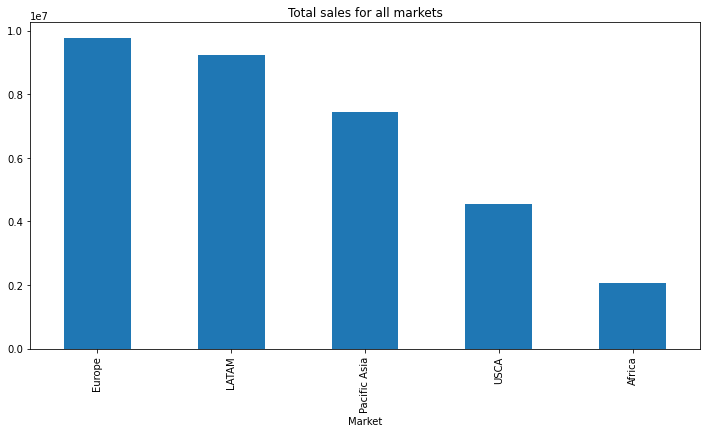

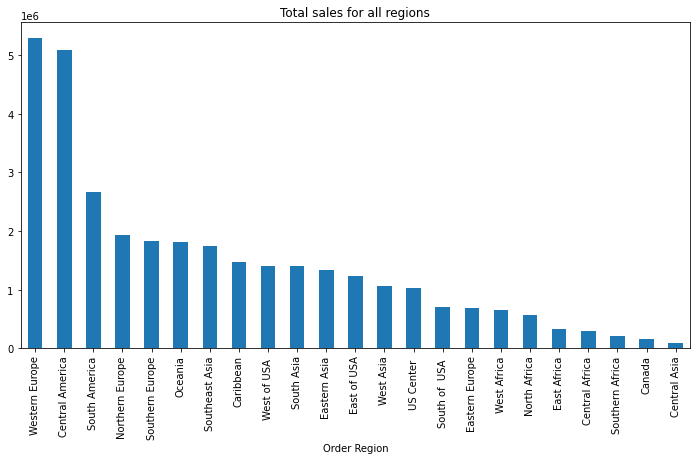

In [94]:
market = df.groupby('Market') #Grouping by market
region = df.groupby('Order Region')
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

<AxesSubplot:title={'center':'Average price'}, xlabel='Category Name'>

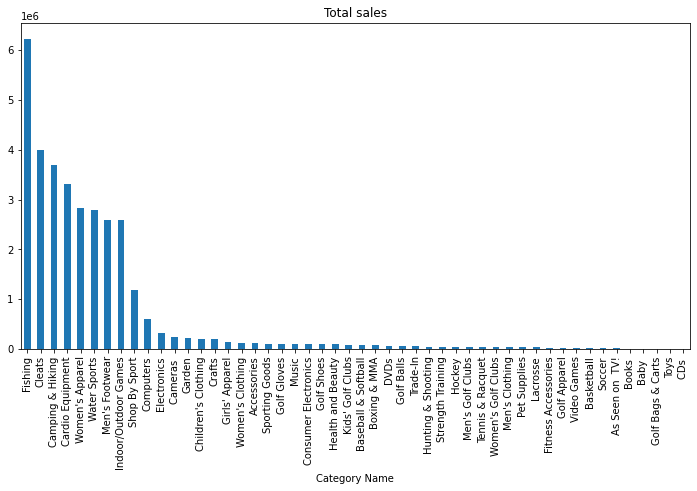

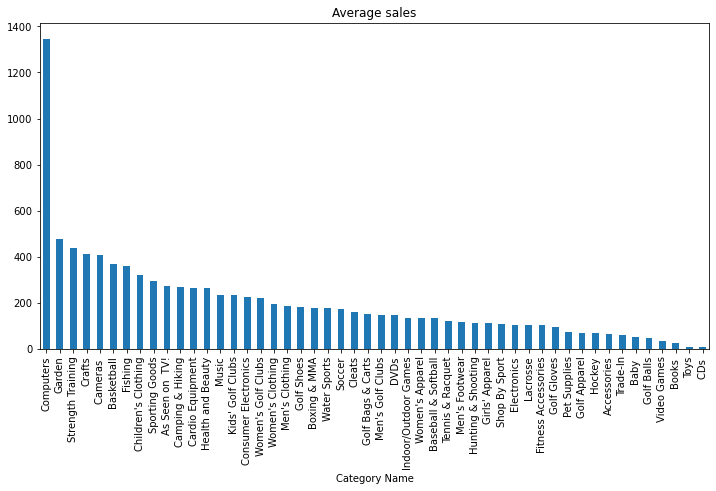

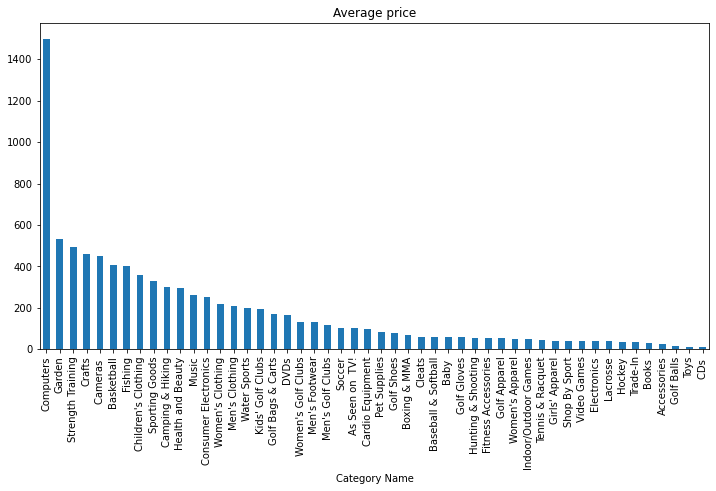

In [95]:
#Grouping all categories
cat = df.groupby('Category Name')

plt.figure(1)
# Total sum of sales for all categories
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")

# Mean sales for all categories
plt.figure(2)
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")

plt.figure(3)
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

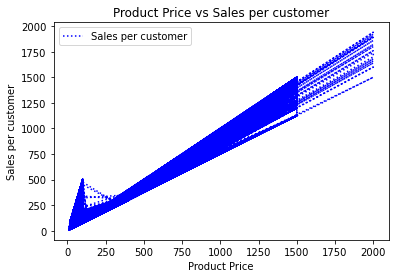

In [96]:
df.plot(x='Product Price', y='Sales per customer',linestyle='dotted',color='blue', markersize=12) 
plt.title('Product Price vs Sales per customer')
plt.xlabel('Product Price') 
plt.ylabel('Sales per customer') 
plt.show()

<AxesSubplot:title={'center':'Average sales for 3 years'}, xlabel='order_year'>

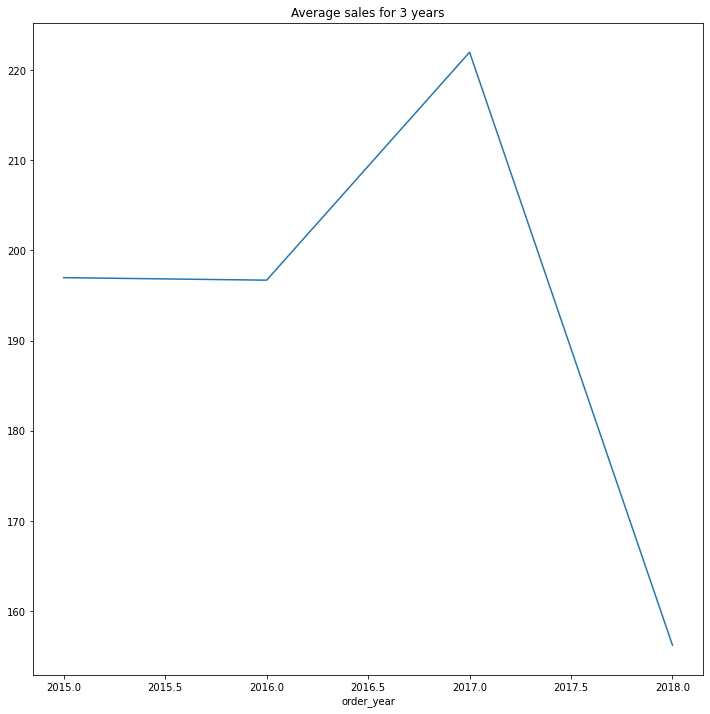

In [97]:
df['order_year']= pd.DatetimeIndex(df['order date (DateOrders)']).year
quater= df.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')

<AxesSubplot:title={'center':'Average sales per week in days'}, xlabel='order_week_day'>

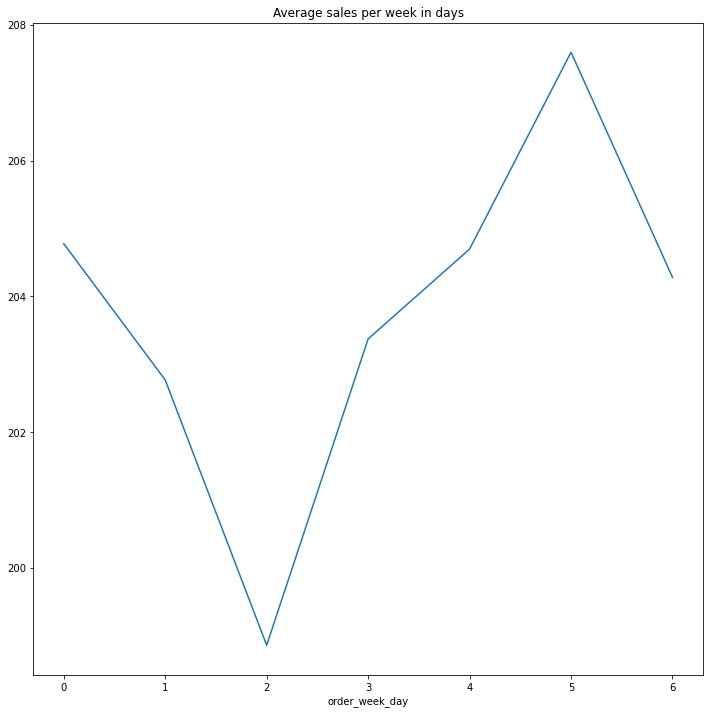

In [98]:
df['order_week_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
days=df.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')

<AxesSubplot:title={'center':'Average sales per day in hrs'}, xlabel='order_hour'>

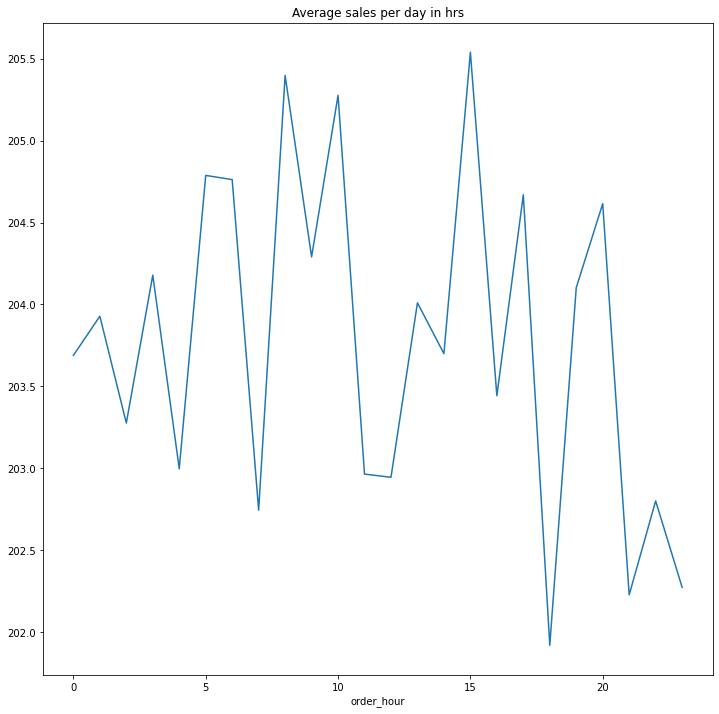

In [99]:
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour
hrs=df.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')

<AxesSubplot:title={'center':'Average sales per year in mnths'}, xlabel='order_month'>

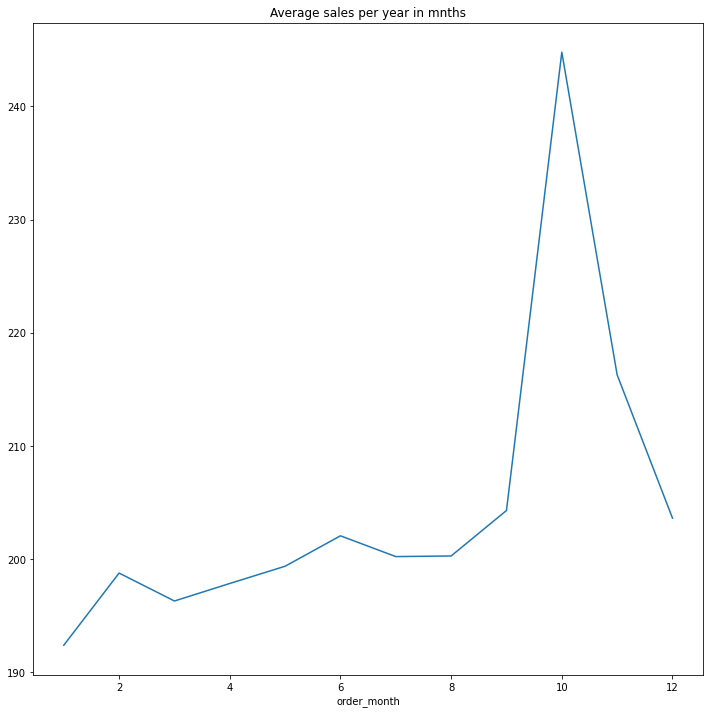

In [100]:
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
mnth=df.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')

In [101]:
df['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

<AxesSubplot:title={'center':'Region Wise count for DEBIT'}>

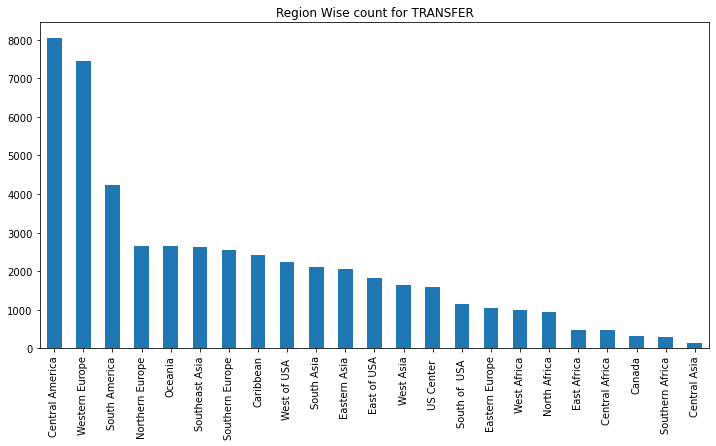

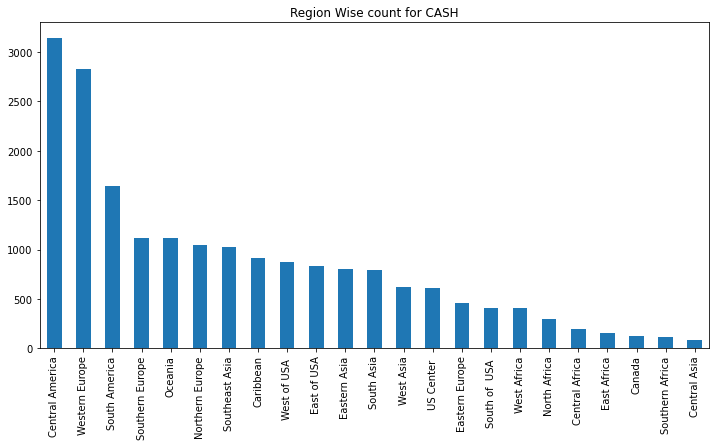

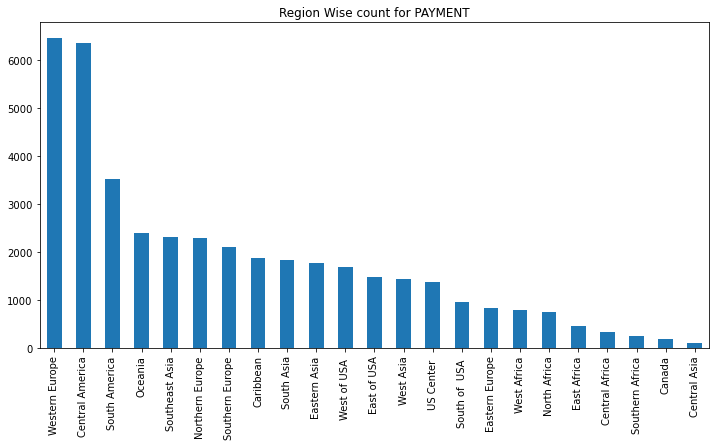

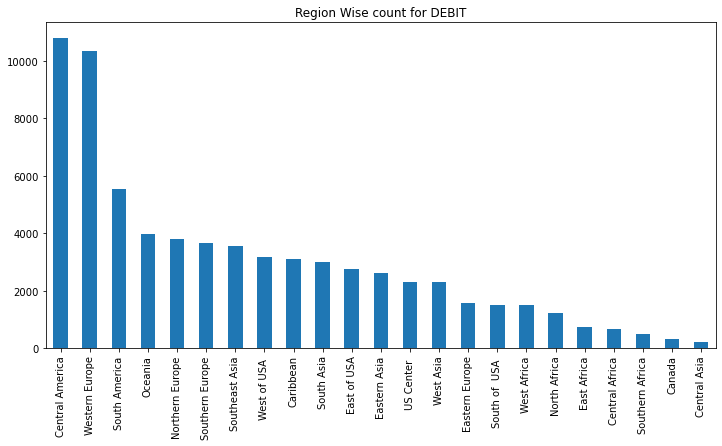

In [102]:
a1 = df[(df['Type'] == 'TRANSFER')]
a2 = df[(df['Type'] == 'CASH')]
a3 = df[(df['Type'] == 'PAYMENT')]
a4 = df[(df['Type'] == 'DEBIT')]

plt.figure(1)
a1['Order Region'].value_counts().plot.bar(figsize=(12,6), title="Region Wise count for TRANSFER")

plt.figure(2)
a2['Order Region'].value_counts().plot.bar(figsize=(12,6), title="Region Wise count for CASH")

plt.figure(3)
a3['Order Region'].value_counts().plot.bar(figsize=(12,6), title="Region Wise count for PAYMENT")

plt.figure(4)
a4['Order Region'].value_counts().plot.bar(figsize=(12,6), title="Region Wise count for DEBIT")

Total revenue lost with orders -3883547.345768667


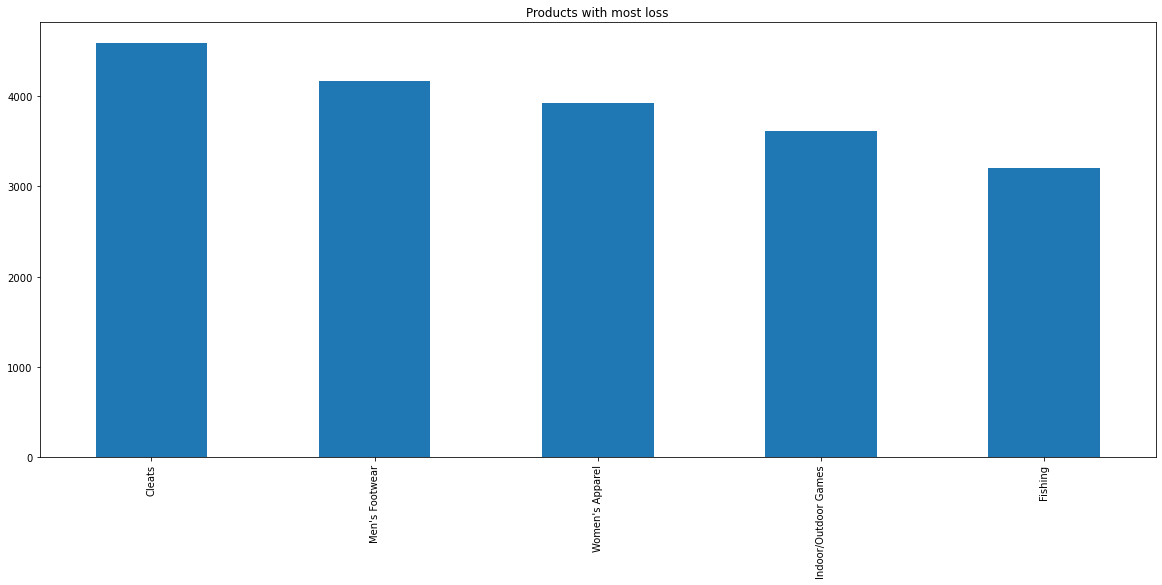

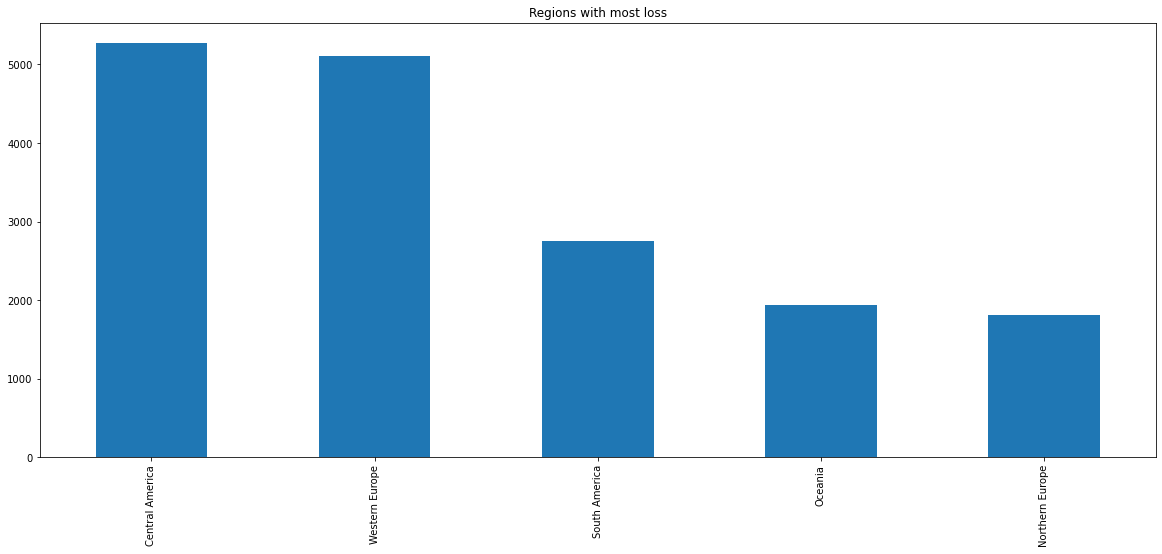

In [103]:
loss = df[(df['Benefit per order']<0)]

#Plotting top 5 products and regions with most loss
plt.figure(1)
loss['Category Name'].value_counts().nlargest(5).plot.bar(figsize=(20,8), title="Products with most loss")

plt.figure(2)
loss['Order Region'].value_counts().nlargest(5).plot.bar(figsize=(20,8), title="Regions with most loss")

#Sum of total sales which are lost
print('Total revenue lost with orders',loss['Benefit per order'].sum())

In [104]:
#Checking type of payment used to conduct fraud other than Transfer
x1 = df[(df['Type'] != 'TRANSFER')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
x1['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

In [105]:
df['Order Region'].nunique()

23

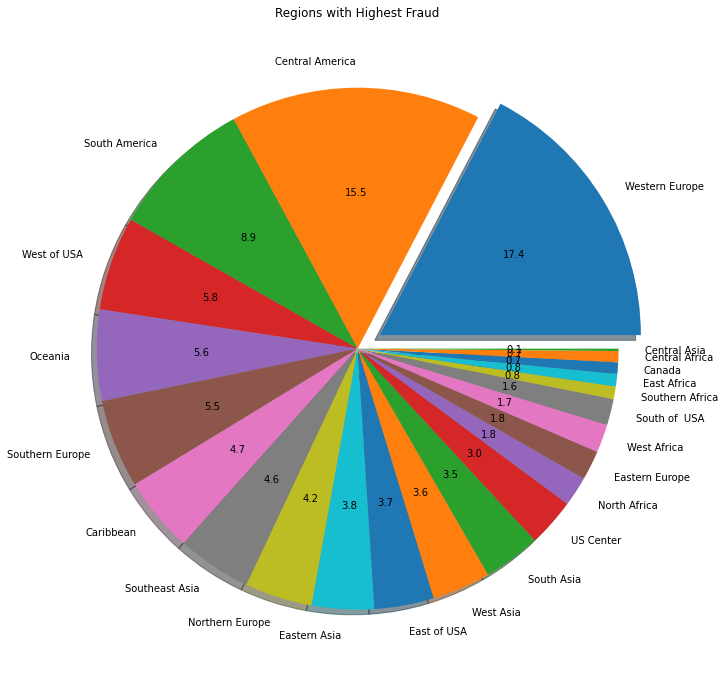

In [106]:
high_fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')] #separating orders with suspected fraud

#Plotting pie chart with respect to order region
fraud = high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),
explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud") # Plotting title
plt.ylabel(" ")
plt.show()

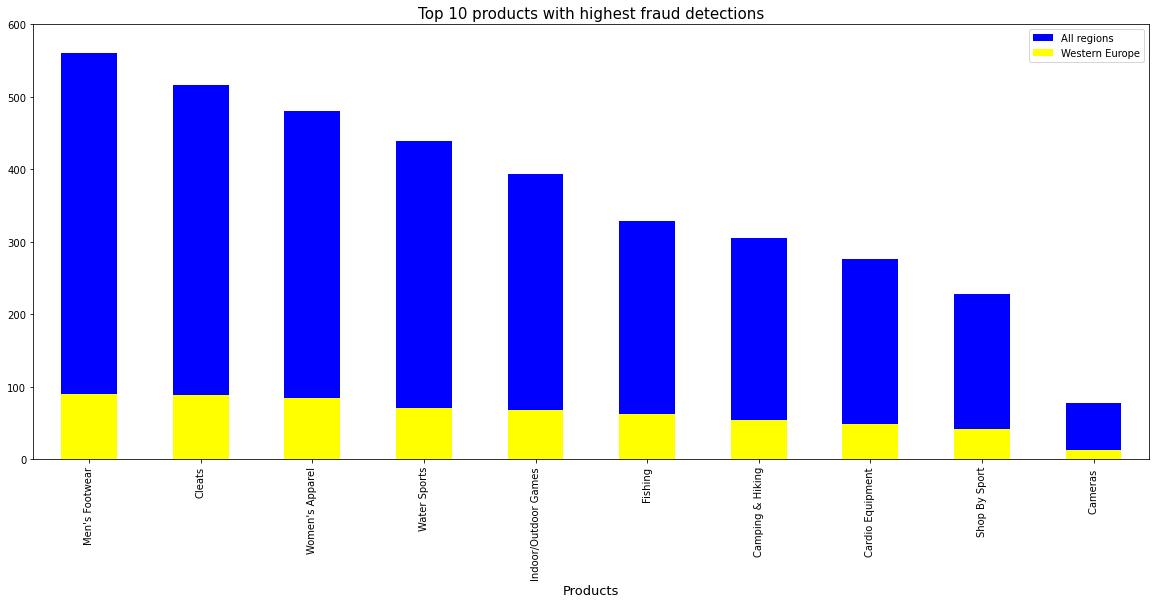

In [107]:
high_fraud1 = df[(df['Order Status'] == 'SUSPECTED_FRAUD')] # 
high_fraud2 = df[(df['Order Status'] == 'SUSPECTED_FRAUD') &(df['Order Region'] == 'Western Europe')]
#Plotting bar chart for top 10 most suspected fraud department in all regions
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='blue')
#Plotting bar chart for top 10 most suspected fraud department in Western Europe
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='yellow')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

<AxesSubplot:title={'center':'Top 10 Highest Fraud Customers'}>

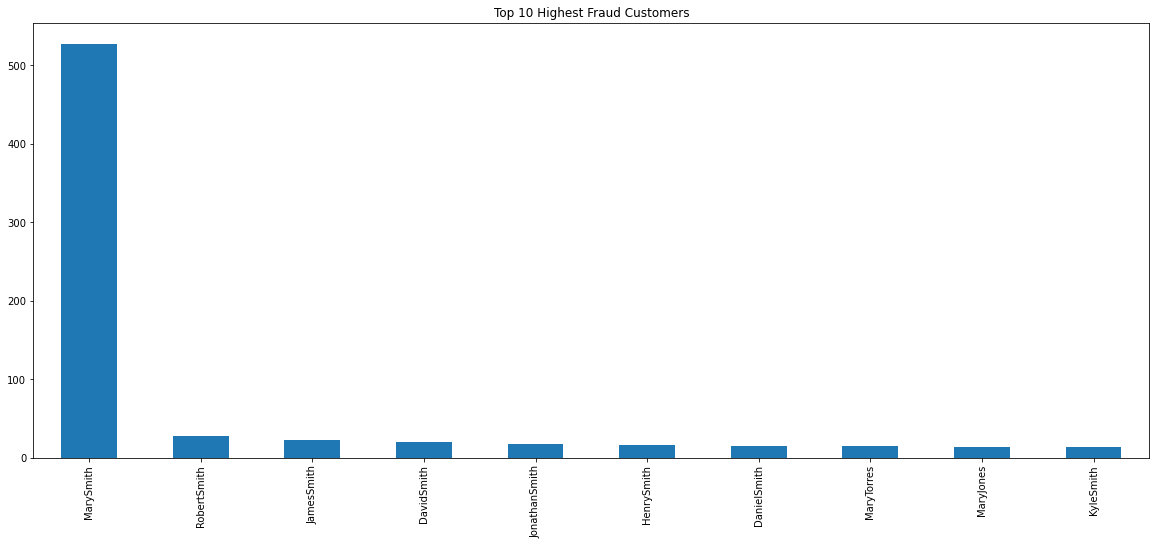

In [108]:
#Filtering out suspected fruad orders

cust = df[(df['Order Status'] == 'SUSPECTED_FRAUD')] 

#Top 10 customers with most fraud
cust['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")

In [109]:
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [110]:
late_delivery = df[(df['Delivery Status'] == 'Late delivery')]


<AxesSubplot:title={'center':'Top 10 products with most late deliveries'}>

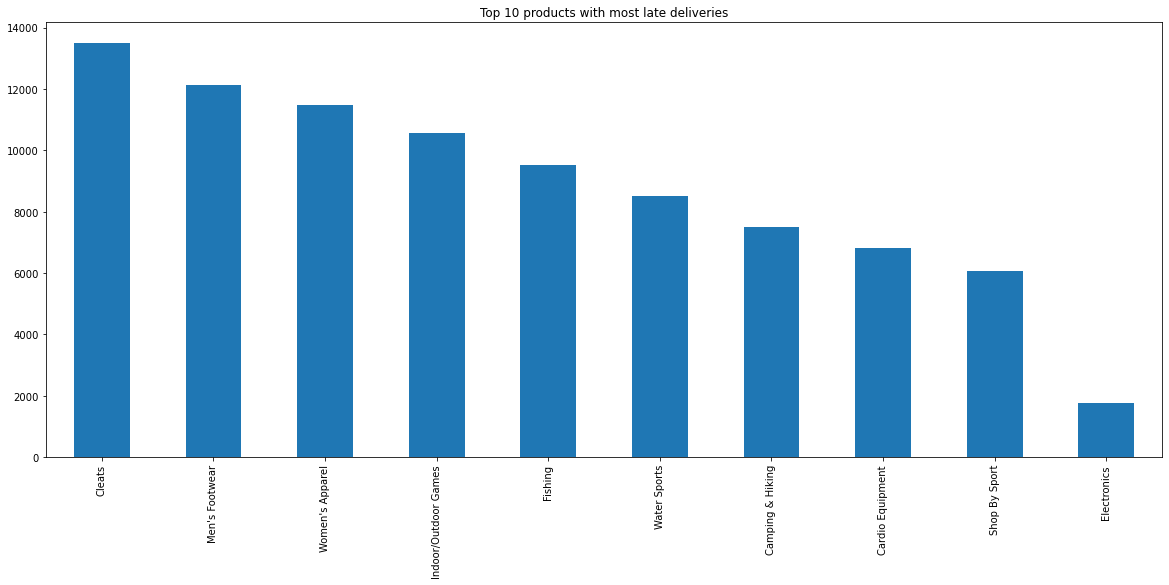

In [111]:
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), 
                                                                    title="Top 10 products with most late deliveries")

# Customer Segmentation

Understanding customer needs and targeting specific clusters of customers based on their need is one way for a supply chain company to increase number of customers and also to gain more profits.
RFM analysis is being used because it utilizes numerical values to show Customer recency,frequency and monetary values.

In [112]:
#Calculating total price for each order
df['TotalPrice'] = df['Order Item Quantity'] * df['Order Item Total']

In [113]:
df['order date (DateOrders)'].max() # Calculating when the last order come to check recency

'9/9/2017 9:50'

In [114]:
from datetime import datetime

In [115]:
#Present date is set to next day of the last order. i.e,2017-09-09
present = datetime(2017,9,10)
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])

In [116]:
# Grouping all values into new data frame named customer segmentation
Customer_seg = df.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days,
                                                      'Order Id': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
#Changing order dates to int format
Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Renaming columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 
                         'Order Id': 'F_Value', 
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,648,1,2362.250061
2,-8,10,2842.700073
3,85,18,6143.760057
4,236,14,4370.629991
5,313,7,2993.790032


R_Value(Recency) indicates how much time elapsed since a customer last order.

F_Value(Frequency) indicates how many times a customer ordered.

M_Value(Monetary value) tells us how much a customer has spent purchasing items.

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

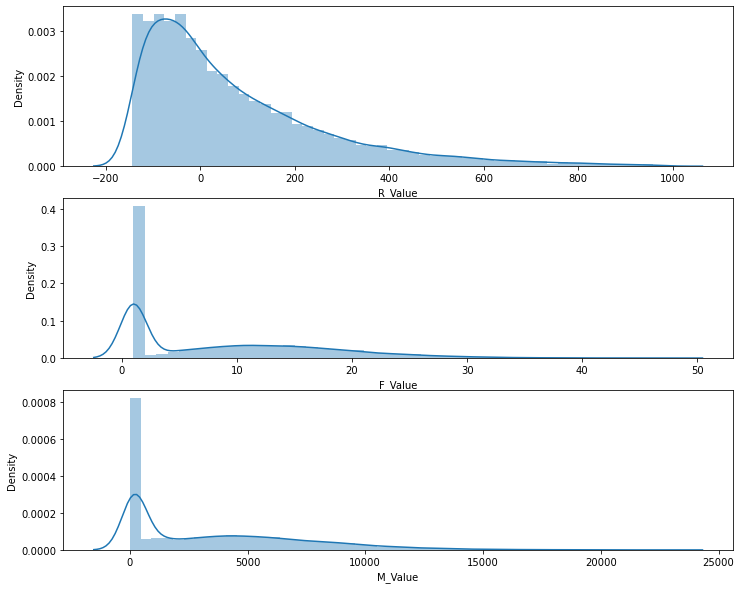

In [117]:
plt.figure(figsize=(12,10)) # Figure size
plt.subplot(3, 1, 1)
sns.distplot(Customer_seg['R_Value'])# Plot distribution of R_Value
plt.subplot(3, 1, 2) 
sns.distplot(Customer_seg['F_Value'])# Plot distribution of F_Value
plt.subplot(3, 1, 3)
sns.distplot(Customer_seg['M_Value'])# Plot distribution of M_Value
plt.show()